# **Proyecto 2 - MDS7202 Laboratorio de Programaci칩n Cient칤fica para Ciencia de Datos 游닄**

**MDS7202: Laboratorio de Programaci칩n Cient칤fica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebasti치n Tinoco
- Ayudante: Arturo Lazcano, Angelo Mu침oz

### Equipo:

- Mathias Gonz치lez Espinoza 
- Eduardo Javier Silva Gaete

### **Link de repositorio de GitHub:** [https://github.com/Zerzer0/MDS7202](https://github.com/Zerzer0/MDS7202)

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler
# from pycaret.classification import *

import optuna
from optuna.samplers import TPESampler

# Informe

## 1. Introducci칩n

En el presente informe se desarrolla un modelo de riesgo crediticio para predecir la probabilidad de incumplimiento de pago de los clientes de nuestra contraparte Giturra, con el objetivo de evaluar el riesgo asociado a cada solicitud de pr칠stamo y mejorar la calidad de las decisiones crediticias. Los datos que utilizamos para trabajar nuestro modelo poseen una amplia gama de variables de los usuarios, como ocupaci칩n, historiales de cr칠dito, ingresos, n칰mero de cuentas vancarias, entre otros factores financieros relevantes, los cuales nos serviran para poder entrenar un modelo m치s robusto y util para las predicciones.

Puesto que abordamos un problema en la que nuestra variable objetivo presenta un desbalance de clases, adem치s que en nuestro contexto es importante tomar en cuenta los costos asociados a los falsos positivos (clasificar err칩neamente un cliente como de alto riesgo cuando no lo es) y los falsos negativos (no detectar un cliente de alto riesgo que luego incumple), la m칠trica que mejor sirve para evaluar el desempe침o del modelo es `F1-Score`, ya que entrega un equilibrio adecuado entre la precisi칩n (capacidad de identificar correctamente a los incumplidores) y el recall (capacidad de no pasar por alto a los incumplidores).

**FALTA AUN**

## 2. An치lisis exploratorio de datos

In [175]:
df = pd.read_parquet('dataset.pq')
df

customer_id   age     occupation  annual_income  monthly_inhand_salary  \
0       CUS_0xd40  23.0      Scientist       19114.12            1824.843333   
1      CUS_0x21b1  28.0        Teacher       34847.84            3037.986667   
2      CUS_0x2dbc  34.0       Engineer      143162.64           12187.220000   
3      CUS_0xb891  55.0   Entrepreneur       30689.89            2612.490833   
4      CUS_0x1cdb  21.0      Developer       35547.71            2853.309167   
...           ...   ...            ...            ...                    ...   
12495  CUS_0x372c  19.0         Lawyer       42903.79            3468.315833   
12496   CUS_0xf16  45.0  Media_Manager       16680.35                    NaN   
12497  CUS_0xaf61  50.0         Writer       37188.10            3097.008333   
12498  CUS_0x8600  29.0      Architect       20002.88            1929.906667   
12499  CUS_0x942c  25.0       Mechanic       39628.99            3359.415833   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                      3                4              3          4.0   
1                      2                4              6          1.0   
2                      1                5              8          3.0   
3                      2                5              4       -100.0   
4                      7                5              5       -100.0   
...                  ...              ...            ...          ...   
12495                  0                4              6          1.0   
12496                  1                1              5          4.0   
12497                  1                4              5          3.0   
12498                 10                8             29          5.0   
12499                  4                6              7          2.0   

       delay_from_due_date  ...  num_credit_inquiries  outstanding_debt  \
0                        3  ...                   4.0            809.98   
1                        3  ...                   2.0            605.03   
2                        8  ...                   3.0           1303.01   
3                        4  ...                   4.0            632.46   
4                        1  ...                   4.0            943.86   
...                    ...  ...                   ...               ...   
12495                    9  ...                   1.0           1079.48   
12496                    1  ...                   8.0            897.16   
12497                    7  ...                   3.0            620.64   
12498                   33  ...                   9.0           3571.70   
12499                   18  ...                   3.0            502.38   

       credit_utilization_ratio  credit_history_age  payment_of_min_amount  \
0                     23.933795                 NaN                     No   
1                     32.933856                27.0                     No   
2                     38.374753                18.0                     No   
3                     27.332515                17.0                     No   
4                     25.862922                31.0                    Yes   
...                         ...                 ...                    ...   
12495                 35.716618                28.0                     No   
12496                 41.212367                 NaN                     No   
12497                 39.300980                30.0                     No   
12498                 37.140784                 6.0                    Yes   
12499                 34.192463                31.0                     No   

       total_emi_per_month amount_invested_monthly  \
0                49.574949               24.785217   
1                18.816215              218.904344   
2               246.992319            10000.000000   
3                16.415452              125.617251   
4                 0.000000              181.330901   
...   

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  float64
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  float64
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  float64
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  float64
 13  outstanding_debt          12500 non-null  float64
 14  credit

In [35]:
df.describe().T

count          mean           std           min  \
age                       12500.0  1.057718e+02  6.645027e+02 -5.000000e+02   
annual_income             12500.0  1.616206e+05  1.297842e+06  7.005930e+03   
monthly_inhand_salary     10584.0  4.186635e+03  3.173690e+03  3.036454e+02   
num_bank_accounts         12500.0  1.693992e+01  1.143508e+02 -1.000000e+00   
num_credit_card           12500.0  2.317272e+01  1.320059e+02  0.000000e+00   
interest_rate             12500.0  7.321336e+01  4.686822e+02  1.000000e+00   
num_of_loan               12500.0  3.099440e+00  6.510528e+01 -1.000000e+02   
delay_from_due_date       12500.0  2.106088e+01  1.486309e+01 -5.000000e+00   
num_of_delayed_payment    11660.0  3.293542e+01  2.374377e+02 -3.000000e+00   
changed_credit_limit      12246.0  1.039858e+01  6.799253e+00 -6.490000e+00   
num_credit_inquiries      12243.0  2.629233e+01  1.818210e+02  0.000000e+00   
outstanding_debt          12500.0  1.426220e+03  1.155169e+03  2.300000e-01   
credit_utilization_ratio  12500.0  3.234926e+01  5.156815e+00  2.010077e+01   
credit_history_age        11380.0  1.823040e+01  8.302078e+00  0.000000e+00   
total_emi_per_month       12500.0  1.488394e+03  8.561450e+03  0.000000e+00   
amount_invested_monthly   11914.0  6.387987e+02  2.049195e+03  0.000000e+00   
monthly_balance           12145.0 -2.744614e+22  3.024684e+24 -3.333333e+26   
credit_score              12500.0  2.881600e-01  4.529241e-01  0.000000e+00   

                                   25%           50%           75%  \
age                          25.000000     33.000000     42.000000   
annual_income             19453.327500  37572.375000  72690.215000   
monthly_inhand_salary      1622.408646   3087.595000   5967.937500   
num_bank_accounts             3.000000      6.000000      7.000000   
num_credit_card               4.000000      5.000000      7.000000   
interest_rate                 8.000000     14.000000     20.000000   
num_of_loan                   1.000000      3.000000      5.000000   
delay_from_due_date          10.000000     18.000000     28.000000   
num_of_delayed_payment        9.000000     14.000000     18.000000   
changed_credit_limit          5.370000      9.410000     14.940000   
num_credit_inquiries          4.000000      6.000000     10.000000   
outstanding_debt            566.072500   1166.155000   1945.962500   
credit_utilization_ratio     28.066517     32.418953     36.623650   
credit_history_age           12.000000     18.000000     25.000000   
total_emi_per_month          31.496968     72.887628    169.634826   
amount_invested_monthly      73.736810    134.093193    261.664256   
monthly_balance             270.150125    339.388524    471.424536   
credit_score                  0.000000      0.000000      1.000000   

                                   max  
age                       8.678000e+03  
annual_income             2.383470e+07  
monthly_inhand_salary     1.520463e+04  
num_bank_accounts         1.756000e+03  
num_credit_card           1.499000e+03  
interest_rate             5.789000e+03  
num_of_loan               1.495000e+03  
delay_from_due_date       6.700000e+01  
num_of_delayed_payment    4.293000e+03  
changed_credit_limit      3.697000e+01  
num_credit_inquiries      2.554000e+03  
outstanding_debt          4.998070e+03  
credit_utilization_ratio  4.819982e+01  
credit_history_age        3.300000e+01  
total_emi_per_month       8.197100e+04  
amount_invested_monthly   1.000000e+04  
monthly_balance           1.463792e+03  
credit_score              1.000000e+00

In [36]:
df.describe(exclude=np.number).T

count unique                             top  freq
customer_id            12500  12500                       CUS_0xd40     1
occupation             12500     16                         _______   880
payment_of_min_amount  12500      3                             Yes  6571
payment_behaviour      12500      7  Low_spent_Small_value_payments  3202

In [59]:
for col in df.columns:
    print(f"Valores 칰nicos de columna '{col}':")
    print(f"{df[col].unique()}\n")

Valores 칰nicos de columna 'customer_id':
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

Valores 칰nicos de columna 'age':
[  23.   28.   34.   55.   21.   31.   30.   24.   45.   41.   33.   36.
   39.   37.   20.   46.   26.   32.   42.   48.   40.   38.   44.   22.
   16.   19.   27.   43. 3052.   14.   25.   18. 4431.   47.   35.   17.
   53.   56.   54.   29.   15.   49. 3115.   51.   50. -500.   52. 4670.
  395. 4049. 4710. 4351. 5784. 5645. 3513. 7805.  831. 8105. 2823.  886.
 3553. 7068. 5504. 4820. 5194. 6556. 1203. 8043. 8628. 3791. 8216.  236.
 5195. 3986. 7123. 5498. 7060. 8421. 7456. 7353. 4021.  306. 1066. 4391.
 2997. 3834. 3493. 6744. 7715. 7723. 4630. 5714. 3038. 4897. 6408. 5981.
 6646. 8669. 6767.  169. 1248. 6360. 5018.  203. 2778. 7490. 1418. 4679.
 5751. 2546. 6611.  325.  305. 8623. 1265. 1094. 2672. 8663. 1520. 4056.
 7279. 5340.  813. 5177.  506. 4177. 2048. 6378. 5376. 3899. 5959. 2347.
 2593. 4120.  655. 4746. 6909. 6506.  

In [31]:
df.isnull().sum()

customer_id                    0
age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1916
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment       840
changed_credit_limit         254
num_credit_inquiries         257
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          1120
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly      586
payment_behaviour              0
monthly_balance              355
credit_score                   0
dtype: int64

In [44]:
df.duplicated().sum()

0

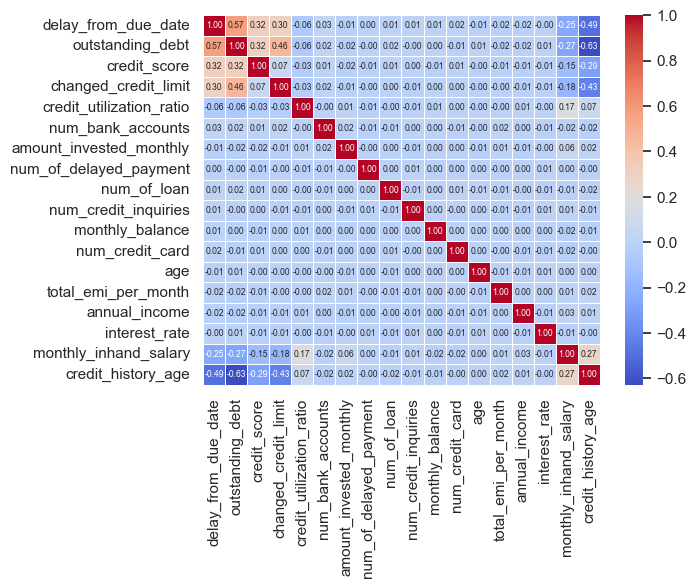

In [26]:
correlation_matrix = df.drop(columns=['customer_id', 'occupation', 'payment_of_min_amount', 'payment_behaviour']).corr()

order = correlation_matrix.mean().sort_values(ascending=False).index
correlation_matrix = correlation_matrix.loc[order, order]

sns.set(style="white")  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, annot_kws={"size": 6.14})

plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'monthly_inhand_salary'}>,
        <Axes: title={'center': 'num_bank_accounts'}>],
       [<Axes: title={'center': 'num_credit_card'}>,
        <Axes: title={'center': 'interest_rate'}>,
        <Axes: title={'center': 'num_of_loan'}>,
        <Axes: title={'center': 'delay_from_due_date'}>],
       [<Axes: title={'center': 'num_of_delayed_payment'}>,
        <Axes: title={'center': 'changed_credit_limit'}>,
        <Axes: title={'center': 'num_credit_inquiries'}>,
        <Axes: title={'center': 'outstanding_debt'}>],
       [<Axes: title={'center': 'credit_utilization_ratio'}>,
        <Axes: title={'center': 'credit_history_age'}>,
        <Axes: title={'center': 'total_emi_per_month'}>,
        <Axes: title={'center': 'amount_invested_monthly'}>],
       [<Axes: title={'center': 'monthly_balance'}>,
        <Axes: title={'center': 'credit_score'}>, <Axes: >, <

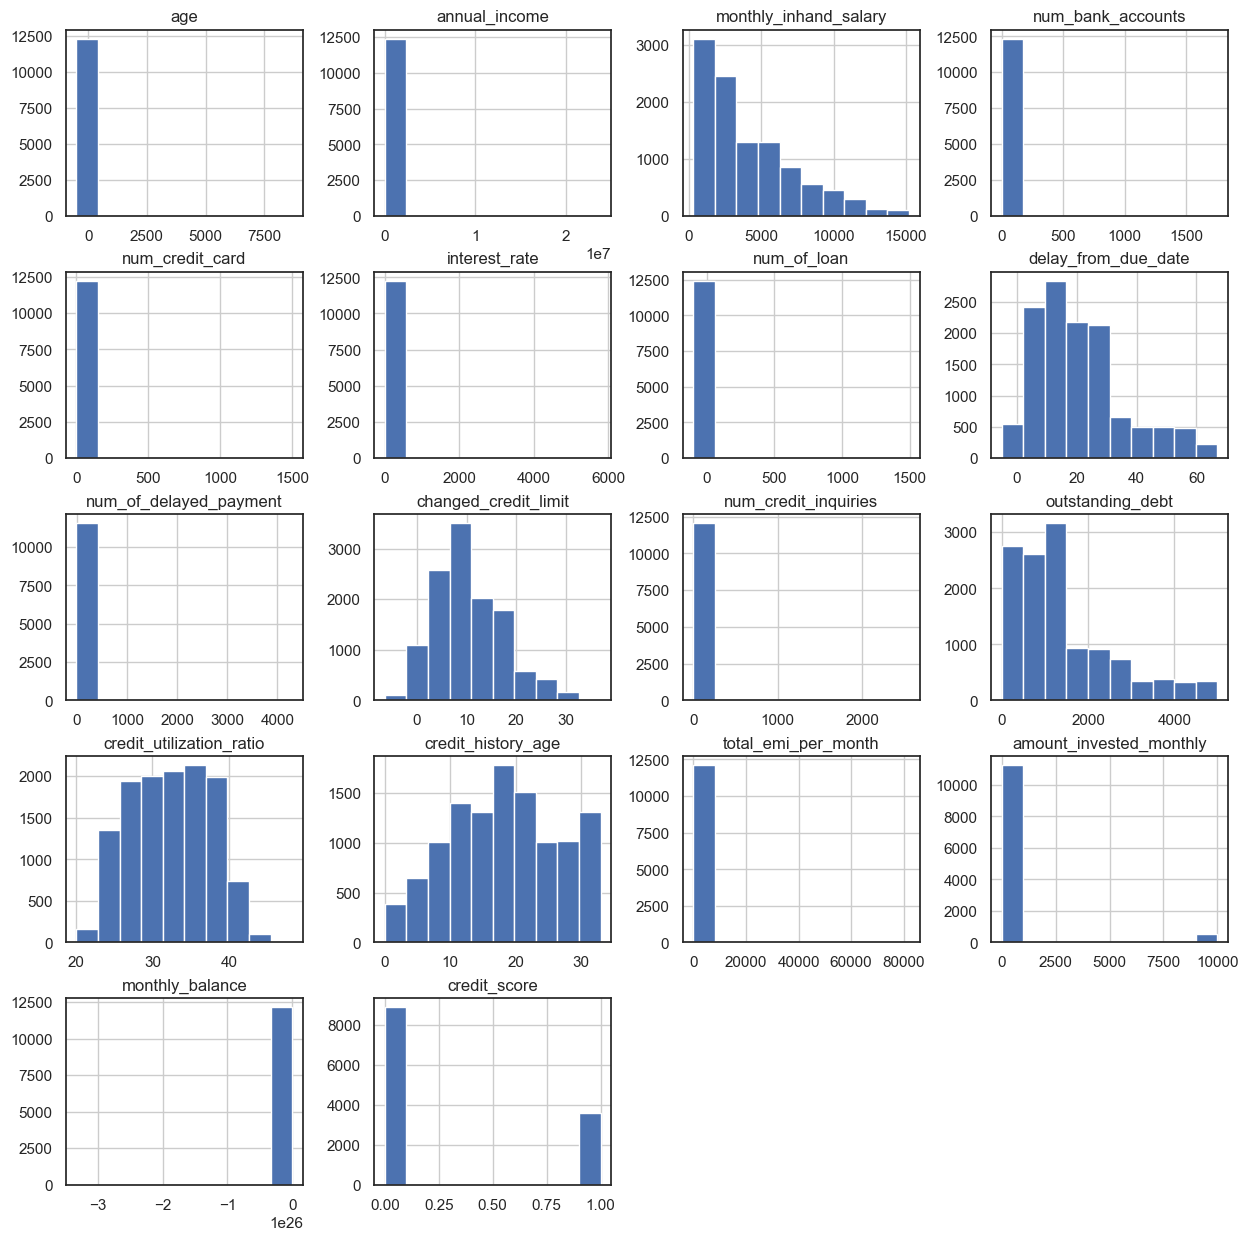

In [178]:
df.hist(figsize=(15,15))

Cosas a destacar:

1. En **'occupation'** hay un nombre '_______'.
2. En **'age'**, **'num_bank_accounts'**, **'num_of_loan'**, **'delay_from_due_date'**, **'num_of_delayed_payment'**, y **'changed_credit_limit'**  hay valores negativos (**'monthly_balance'** el negativo puede tomarse como que queda debiendo dinero).
3. En **'payment_behaviour'** se encuentra un valor extra침o ('!@9#%8').
4. Varios valores nulos.
5. Clase objetivo **'credit_score'** desbalanceada.

## 3. Preparaci칩n de datos

Para la preparaci칩n de los datos, primero se corregir치 los valores extra침os que se encontraron durante el an치lisis exploratorio de datos, transformando estos valores a **nulos**:

In [179]:
df['occupation'].replace('_______', np.nan, inplace=True)
df['payment_behaviour'].replace('!@9#%8', np.nan, inplace=True)

columnas_a_modificar = ["age", "num_bank_accounts", "num_of_loan", "delay_from_due_date", "num_of_delayed_payment", "changed_credit_limit"]
df[columnas_a_modificar] = df[columnas_a_modificar].map(lambda x: np.nan if x < 0 else x)

Ahora designamos nuestras variables con valores categ칩ricos y num칠ricos, eliminando en el paso las variables que no aportan en la predicci칩n, y sacando de la lista nuestra variable objetivo:

In [180]:
df_new = df.drop(columns='customer_id')

columnas_categoricas = df_new.drop(columns=['credit_score']).select_dtypes(include='object').columns
columnas_numericas = df_new.drop(columns=['credit_score']).select_dtypes(exclude='object').columns

Tambien generaremos un `ColumnTransformer` que nos ayudar치 a trabajar los datos para que puedan ser ingresados a los algoritmos de predici칩n, entre los procesamiento que haremos est치n:

- **Variables categ칩ricas:** Se tranformar치n los datos categ칩ricos a variable one hot, usando `OneHotEncoder`, con el par치metro `sparse_output=False` para poder tener posteriormente una salida de los datos en formato pandas.
- **Variables num칠ricas:** Se realizar치 una estandarizaci칩n de los datos usando `StandardScaler` con parametros est치ndar.

Adem치s, designamos `.set_output(transform="pandas")` para que la salida de los datos procesados est칠 en formato pandas. Finalmente realizamos la transformaci칩n de los datos.

In [181]:
preprocessor = ColumnTransformer(
    transformers=[
        ('StandarScaler', StandardScaler(), columnas_numericas),
        ('OneHotEncoder', OneHotEncoder(sparse_output=False), columnas_categoricas)
    ])
preprocessor.set_output(transform="pandas")

preprocessor.fit_transform(df_new)

StandarScaler__age  StandarScaler__annual_income  \
0               -0.132126                     -0.109807   
1               -0.124606                     -0.097684   
2               -0.115583                     -0.014223   
3               -0.084000                     -0.100887   
4               -0.135134                     -0.097144   
...                   ...                           ...   
12495           -0.138142                     -0.091476   
12496           -0.099040                     -0.111682   
12497           -0.091520                     -0.095880   
12498           -0.123102                     -0.109122   
12499           -0.129118                     -0.093999   

       StandarScaler__monthly_inhand_salary  StandarScaler__num_bank_accounts  \
0                                 -0.744213                         -0.121941   
1                                 -0.361945                         -0.130685   
2                                  2.521028                         -0.139429   
3                                 -0.496021                         -0.130685   
4                                 -0.420138                         -0.086965   
...                                     ...                               ...   
12495                             -0.226346                         -0.148173   
12496                                   NaN                         -0.139429   
12497                             -0.343347                         -0.139429   
12498                             -0.711107                         -0.060733   
12499                             -0.260661                         -0.113197   

       StandarScaler__num_credit_card  StandarScaler__interest_rate  \
0                           -0.145247                     -0.149816   
1                           -0.145247                     -0.143415   
2                           -0.137672                     -0.139148   
3                           -0.137672                     -0.147682   
4                           -0.137672                     -0.145549   
...                               ...                           ...   
12495                       -0.145247                     -0.143415   
12496                       -0.167974                     -0.145549   
12497                       -0.145247                     -0.145549   
12498                       -0.114944                     -0.094339   
12499                       -0.130096                     -0.141281   

       StandarScaler__num_of_loan  StandarScaler__delay_from_due_date  \
0                       -0.053998                           -1.232985   
1                       -0.101709                           -1.232985   
2                       -0.069902                           -0.894754   
3                             NaN                           -1.165339   
4                             NaN                           -1.368277   
...                           ...                                 ...   
12495                   -0.101709                           -0.827108   
12496                   -0.053998                           -1.368277   
12497                   -0.069902                           -0.962400   
12498                   -0.038094                            0.796402   
12499                   -0.085805                           -0.218292   

       StandarScaler__num_of_delayed_payment  \
0                                  -0.114074   
1                                  -0.122469   
2                                  -0.114074   
3                                  -0.101482   
4                                  -0.076297   
...                                      ...   
12495                                    NaN   
12496                              -0.139259   
12497                              -0.101482   
12498                              -0.034323   
12499                              -0.114074   

       StandarScal

Se puede ver que a todas las variables categ칩ricas se le realiz칩 el encoder OneHot, y a las variables num칠ricas se les estandariz칩.

Lo siguiente que se realizar치 es separar nuestros datos en conjuntos de entrenamiento, prueba y validaci칩n usando `train_test_split`, con proporciones 90%, 10% y 10% respectivamente, adem치s de fijar una semilla para poder replicar resultados, y de balancear las clases usando `stratify`.

In [182]:
seed = 42

X = df_new.drop(columns='credit_score')
y = df_new['credit_score']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=seed, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=seed, stratify=y_temp)

print(f"N칰mero de datos en set de entrenamiento: {X_train.shape[0]}")
print(f"N칰mero de datos en set de validaci칩n: {X_val.shape[0]}")
print(f"N칰mero de datos en set de prueba: {X_test.shape[0]}")

N칰mero de datos en set de entrenamiento: 10000
N칰mero de datos en set de validaci칩n: 1250
N칰mero de datos en set de prueba: 1250


Para el caso de los valores nulos, nos enfocaremos en primera instancia en la eliminaci칩n de los valores nulos, para ellos se crea una funci칩n que permite elegir entre inputar datos o eliminarlos, para luego ser guardado en un `FunctionTransformer`.

In [183]:
def clean_nan(dataframe, variables=None, tecnica='dropna'):
            df = dataframe.copy()
            # Filtraci칩n de variables
            if variables == None:
                variables = df.columns
            else:
                variables = list(variables)

            df = df[variables]

            if tecnica == "dropna":
                df.dropna(subset=variables, inplace=True)
            elif tecnica == "imputer":
                for var in variables:
                    data = df[var]
                    var_type = data.dtype
                    if is_numeric_dtype(var_type):
                        imputer = SimpleImputer(strategy="mean")
                        df[var] = imputer.fit_transform(df[var])
                    elif is_object_dtype(var_type):
                        imputer = SimpleImputer(strategy="most_frequent")
                        df[var] = SimpleImputer.fit_transform(df[var])
            else:
                raise ValueError("T칠cnica inv치lida")
            
            return df

tranformer_dropna = FunctionTransformer(clean_nan)

Aplicando el `FunctionTransformer` a nuestro dataframe, obtendremos la siguiente cantidad de datos en los set de entrenamiento, validaci칩n y prueba.

In [184]:
seed = 42

df_dopna = tranformer_dropna.fit_transform(df_new)

X = df_dopna.drop(columns='credit_score')
y = df_dopna['credit_score']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=seed, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=seed, stratify=y_temp)

print(f"N칰mero de datos en set de entrenamiento: {X_train.shape[0]}")
print(f"N칰mero de datos en set de validaci칩n: {X_val.shape[0]}")
print(f"N칰mero de datos en set de prueba: {X_test.shape[0]}")

N칰mero de datos en set de entrenamiento: 5099
N칰mero de datos en set de validaci칩n: 638
N칰mero de datos en set de prueba: 638


## 4. Baseline

En esta secci칩n se implementar치n varias `Pipeline` usando el `ColumnTransformer` implementado anteriormente. En cada Pipeline, variaremos el modelo a entrenar, y cabe decir que cada modelo usado se instanciar치 con sus par치metros por defecto, puesto que solo queremos comprar los modelos bases en primera instancia. Para el entrenamiento de cada modelo se usar치 el set de entrenamiento, y para evaluar, el set de prueba. Tambien se fija semilla para poder replicar los resultados. 

Luego de ya entrenados los modelos, se prodecer치 a entregar resultados de todas las m칠trica usando `classification_report`, pero la m칠trica en la que no centraremos principalmente, tal como se dijo en la introducci칩n, ser치 `F1-Score`, donde guardaremos su valor con su correspondiente modelo en un `Dataframe` y compararemos todos los modelos para entregar conclusiones de cual obtuvo mejor desempe침o.

In [196]:
# Lista con los modelos
models = [
    ('Dummy', DummyClassifier(strategy='stratified', random_state=seed)),
    ('LogisticRegression', LogisticRegression(random_state=seed)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=seed)),
    ('SVC', SVC(random_state=seed)),
    ('RandomForestClassifier', RandomForestClassifier(random_state=seed)),
    ('LGBMClassifier', LGBMClassifier(random_state=seed)),
    ('XGBClassifier', XGBClassifier(random_state=seed))
]

# Lista donde se guardar치n los diccionarios con los valores de las m칠tricas por modelo
results = []

for name, model in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('clasificador', model)
    ])

    # Entrenar el modelo, evaluar y entregar m칠tricas
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    reporte_clasificacion = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Mostramos los resultados
    print(f'Classification Report para {name}:\n{reporte_clasificacion}')
    print(f'F1-Score para {name}: {f1}\n')

    # Guardamos los resultados en un diccionario y los agregamos a la lista de resultados
    results.append({'Modelo': name, 'F1-Score': f1})

Classification Report para Dummy:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       453
           1       0.31      0.31      0.31       185

    accuracy                           0.60       638
   macro avg       0.52      0.52      0.52       638
weighted avg       0.60      0.60      0.60       638

F1-Score para Dummy: 0.31351351351351353

Classification Report para LogisticRegression:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       453
           1       0.63      0.31      0.41       185

    accuracy                           0.75       638
   macro avg       0.70      0.62      0.63       638
weighted avg       0.73      0.75      0.72       638

F1-Score para LogisticRegression: 0.4145454545454546

Classification Report para KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       453
           

In [197]:
# Convertimos el diccionario con los resultados en un DataFrame
df_resultados = pd.DataFrame(results)

# Ordenamos de mayor a menor segun el valor de la m칠trica F1-Score
df_resultados = df_resultados.sort_values(by='F1-Score', ascending=False)

print('\nResultados ordenados por F1-Score:')
print(df_resultados)


Resultados ordenados por F1-Score:
                   Modelo  F1-Score
5  RandomForestClassifier  0.574132
6          LGBMClassifier  0.556250
7           XGBClassifier  0.532915
2    KNeighborsClassifier  0.480769
3  DecisionTreeClassifier  0.431579
4                     SVC  0.419118
1      LogisticRegression  0.414545
0                   Dummy  0.313514


Seg칰n de lo que podemos ver del Dataframe con los resultados de la m칠trica F1-Score y los modelos correspondientes, se tiene que todos los modelos pudieron sobrepasar el valor F1-Score del modelo `Dummy`, el cual es de 0.313, adem치s el modelo `RandomForestClassifier` pudo lograr el mayor valor, con un valor F1-Score de 0.574, que comparado con el clasificador `Dummy`, presenta una diferencia de casi el doble, este se puede deber a que los modelos Random Forest tienen la capacidad de manejar caracter칤sticas irrelevantes y sobreajuste mejor que algunos modelos m치s simples como KNeighbors o Decision Tree, adem치s que puede capturar relaciones no lineales entre las caracter칤sticas y las etiquetas, y proporcionar una medida de importancia de las caracter칤sticas. Si consideramos la idea de optimizar los par치metros de cada modelo y el tiempo que esto toma, el mejor modelo para realizar este proceso ser칤a `RandomForestClassifier`, ya que no es un modelo que tome tanto tiempo en entrenarse como `SVM`, `LGBMClassifier ` o `XGBClassifier`, pero tampoco tan poco como los modelos `LogisticRegression`, y `KNeighborsClassifier`, adem치s de que entrega resultados prometedores.

## 5. Optimizaci칩n del modelo

In [212]:
seed = 42

sampler = TPESampler(seed=seed)

# Funci칩n objetivo para optimizar RandomForest
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5),
    }

    params_ohe = {
        'min_frequency': trial.suggest_float('min_frecuency', 0.0, 1.0)
    }

    preprocessor_rf = ColumnTransformer(
    transformers=[
        ('StandarScaler', StandardScaler(), columnas_numericas),
        ('OneHotEncoder', OneHotEncoder(sparse_output=False, **params_ohe), columnas_categoricas)
    ])
    preprocessor.set_output(transform="pandas")
    

    pipeline = Pipeline([
        ('preprocessor', preprocessor_rf),
        ('clasificador', RandomForestClassifier(random_state=seed, **params))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    return f1

# Funci칩n objetivo para optimizar LGBM
def objective_lgbm(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 50),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 20),
    }

    params_ohe = {
        'min_frequency': trial.suggest_float('min_frecuency', 0.0, 1.0)
    }

    preprocessor_lgbm = ColumnTransformer(
    transformers=[
        ('StandarScaler', StandardScaler(), columnas_numericas),
        ('OneHotEncoder', OneHotEncoder(sparse_output=False, **params_ohe), columnas_categoricas)
    ])
    preprocessor.set_output(transform="pandas")

    pipeline = Pipeline([
        ('preprocessor', preprocessor_lgbm),
        ('clasificador', LGBMClassifier(random_state=seed, **params))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    return f1

# Configuraci칩n de Optuna para la optimizaci칩n
study_rf = optuna.create_study(direction='maximize', sampler=sampler)
study_lgbm = optuna.create_study(direction='maximize', sampler=sampler)

study_rf.optimize(objective_rf, timeout=300)
study_lgbm.optimize(objective_lgbm, timeout=300)

[I 2023-12-16 20:17:43,737] A new study created in memory with name: no-name-09cc75db-1e01-4b10-a1b5-574812550377
[I 2023-12-16 20:17:43,739] A new study created in memory with name: no-name-4ff7fe25-4673-4050-b739-a9bd023d77f6
[I 2023-12-16 20:17:44,008] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 91, 'max_depth': 4, 'min_samples_split': 0.5805175605464081, 'min_samples_leaf': 0.4975280551084269, 'min_frecuency': 0.29377135128380893}. Best is trial 0 with value: 0.0.
[I 2023-12-16 20:17:44,300] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 72, 'max_depth': 10, 'min_samples_split': 0.5850793403436195, 'min_samples_leaf': 0.3008441984010618, 'min_frecuency': 0.19702735821426398}. Best is trial 0 with value: 0.0.
[I 2023-12-16 20:17:44,420] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 36, 'max_depth': 4, 'min_samples_split': 0.3631187481762067, 'min_samples_leaf': 0.48692011884118624, 'min_frecuency': 0.7787298528748385}. Bes

KeyboardInterrupt: 

## 6. Interpretabilidad del modelo

## 7. Conclusiones